In [2]:
exec(open("./autoencoderhelperfunctions.py").read())
df = pd.read_csv("./101620_roman.csv", index_col = 0)
labels1 = pd.read_csv('./101420_romanvecs.csv', index_col = 0)
#labels2 = labels1[~labels1.text.str.contains('і')].copy()
#labels3 = labels2[~labels2.text.str.contains('стихия')].copy()
#labels4 = labels3[~labels3.text.str.contains('стихии')].copy()
#labels = labels4[~labels4.text.str.contains('стихает')].copy()
labels = labels1.dropna()
labels = labels.reset_index(drop = True)

In [5]:
og.head()

,0,1,2
0,-0.206629,0.108134,0.017197
1,-0.769393,0.782226,-0.482484
2,-0.273834,-0.048424,-0.572010
3,-0.625786,-0.068009,0.016747
4,-0.138776,0.212537,-0.044223


In [3]:
og= df[['0','1','2']]

done
done
Accuracy: 0.9862068965517241


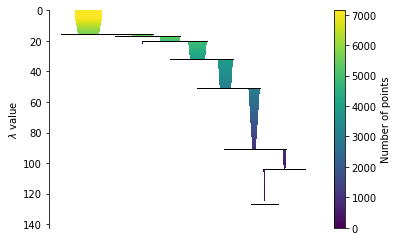

In [21]:
og2 = np.array(og) 
svm_ = return_hdbscansvm(og2, rf = False, svmc= 1000, txt_col = labels['text'], clust_size = 18, samp_size = 10, svmx = True, clust_metric = 'manhattan')

make_graph(og2, svm_[0]['text'], svm_[1], colors = "Inferno", PCA = False)
#X1 = og
%matplotlib inline
svm_[2].condensed_tree_.plot(select_clusters = False)

In [23]:
dice = range(0,10)
for_tatyana = []
for i in dice:
    temp = svm_[0][svm_[0][i] == 1]
    res = temp['text'].sample(n=10, random_state=7)
    res = res.reset_index(drop = True)
    for_tatyana.append(res)
    
    
for j, i in enumerate(for_tatyana):
    print('\n')
    print('TOPIC' + ' ' + str(j) + '\n')
    for n in i:
        print(n)



TOPIC 0

('Вспоминали старые истории о романах профессора Павленко, о войне, о жене Данькевича и еще многое другое.', 0)
('повесть Авенариуса «Меньшой потешный».', 0)
('...Прочел при керосиночке повесть в стихах Павла Антокольского «Сын».', 0)
('Закончил новеллу о Горьком.', 0)
('Это повесть о Литинституте.', 0)
('Вчера статья А. Фадеева о повести Платонова «Впрок».', 0)
('Конечно, зашла речь и о моем новом романе.', 0)
('«Чрезвычайный посол» — философская повесть о Древнем Риме, о гениальном изобретателе, придумавшем пароходы и паровую скороварку.', 0)
('Написал письмо — отзыв о повести Пришвина «Слово правды» Твардовскому<com id="15347095431424"/>.', 0)
('* Рассказы и повесть «Колония Ланфиер».', 0)


TOPIC 1

('Случайно прочла книжку какой-то Веледницкой «Моя повесть», там рассказ о Володиной смерти.', 1)
('О последней повести — ее нет в дипломе, она о Литинституте, и «даже о людях, которые присутствуют в этой аудитории».', 1)
('Александр Житинский, предисловие к роману:  \n\n>Дми

In [33]:
 svm_[1]

array([15, 21, 18, ..., 16,  6,  9])

In [24]:
df['entry_type'] =  svm_[1]
df.to_csv('./101820_stikhicats.csv')